# Análise dos dados

**Em função do que irá ser feitos nos desafios, alguns tópicos do notebook da aula passada serão abordados novamente**

Importação da biblioteca de análise e pré-configuração

In [1]:
import pandas as pd
#Mostrar dados em até 2 casas decimais
%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(uri)
#Visualização desses dados, como estão organizados
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,1,"3,550,308.00",São Paulo,35.00,SP,1,2,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


Todas as colunas da base de dados do ENEM

In [2]:
print(dados.columns.values)

['NU_INSCRICAO' 'NU_ANO' 'CO_MUNICIPIO_RESIDENCIA'
 'NO_MUNICIPIO_RESIDENCIA' 'CO_UF_RESIDENCIA' 'SG_UF_RESIDENCIA'
 'NU_IDADE' 'TP_SEXO' 'TP_ESTADO_CIVIL' 'TP_COR_RACA' 'TP_NACIONALIDADE'
 'CO_MUNICIPIO_NASCIMENTO' 'NO_MUNICIPIO_NASCIMENTO' 'CO_UF_NASCIMENTO'
 'SG_UF_NASCIMENTO' 'TP_ST_CONCLUSAO' 'TP_ANO_CONCLUIU' 'TP_ESCOLA'
 'TP_ENSINO' 'IN_TREINEIRO' 'CO_ESCOLA' 'CO_MUNICIPIO_ESC'
 'NO_MUNICIPIO_ESC' 'CO_UF_ESC' 'SG_UF_ESC' 'TP_DEPENDENCIA_ADM_ESC'
 'TP_LOCALIZACAO_ESC' 'TP_SIT_FUNC_ESC' 'IN_BAIXA_VISAO' 'IN_CEGUEIRA'
 'IN_SURDEZ' 'IN_DEFICIENCIA_AUDITIVA' 'IN_SURDO_CEGUEIRA'
 'IN_DEFICIENCIA_FISICA' 'IN_DEFICIENCIA_MENTAL' 'IN_DEFICIT_ATENCAO'
 'IN_DISLEXIA' 'IN_DISCALCULIA' 'IN_AUTISMO' 'IN_VISAO_MONOCULAR'
 'IN_OUTRA_DEF' 'IN_GESTANTE' 'IN_LACTANTE' 'IN_IDOSO'
 'IN_ESTUDA_CLASSE_HOSPITALAR' 'IN_SEM_RECURSO' 'IN_BRAILLE'
 'IN_AMPLIADA_24' 'IN_AMPLIADA_18' 'IN_LEDOR' 'IN_ACESSO' 'IN_TRANSCRICAO'
 'IN_LIBRAS' 'IN_LEITURA_LABIAL' 'IN_MESA_CADEIRA_RODAS'
 'IN_MESA_CADEIRA_SEPARADA' '

Fazer uma análise geral dessa base de dados

In [3]:
dados.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,...,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,"137,844.00","137,844.00","137,844.00","137,844.00","137,843.00","132,485.00","137,844.00","137,844.00","133,140.00","133,140.00","137,844.00","137,844.00","137,844.00","86,900.00","137,844.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00",...,"137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,838.00","137,838.00","137,838.00","137,838.00","97,537.00","103,774.00","103,774.00","97,537.00","97,537.00","103,774.00","103,774.00","97,537.00","137,844.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","137,844.00"
mean,"180,010,423,553.31","2,018.00","3,118,377.40",31.03,22.38,0.12,2.12,1.04,"3,085,664.65",30.70,1.54,3.00,1.34,1.20,0.10,"31,587,077.66","3,160,970.21",31.45,2.31,1.03,1.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,119,912.84",31.05,0.71,0.75,0.75,0.71,448.51,452.52,456.51,460.50,493.63,568.31,526.59,535.18,0.53,1.10,121.73,101.70,97.18,117.03,71.50,509.13,3.90
std,"1,918,950.00",0.00,"994,483.04",9.92,7.61,0.38,1.02,0.23,"975,680.73",9.72,0.72,4.00,0.70,0.60,0.29,"9,765,074.33","979,871.51",9.77,0.78,0.18,0.12,0.03,0.01,0.02,0.02,0.00,0.04,0.02,0.03,0.01,0.01,0.01,0.02,0.03,0.02,0.03,0.00,0.00,0.04,0.01,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,"994,800.12",9.92,0.46,0.43,0.43,0.46,1.21,1.33,1.31,1.14,74.18,81.03,73.02,102.83,0.50,0.69,31.32,49.51,47.00,35.20,52.21,187.01,1.51
min,"180,007,186,686.00","2,018.00","1,100,015.00",11.00,13.00,0.00,0.00,0.00,"1,100,015.00",11.00,1.00,0.00,1.00,1.00,0.00,"11,000,058.00","1,100,015.00",11.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,100,015.00",11.00,0.00,0.00,0.00,0.00,447.00,451.00,455.00,459.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,"180,008,761,760.75","2,018.00","2,409,100.00",24.00,18.00,0.00,1.00,1.00,"2,408,102.00",24.00,1.00,0.00,1.00,1.00,0.00,"24,328,308.00","2,414,407.00",24.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

Dadas as últimas colunas, referentes as notas é possível encontrar alguma correlação entre elas?

Para fazer isso, vamos considerar eliminar linhas em que os participantes não tiveram nota

In [4]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas].dropna()
#Mudar o nome das colunas
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
#Pequena análise da mudança
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


Verificar uma correlação entre as notas

In [5]:
corr = dados_notas.corr()
corr

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.00,0.57,0.60,0.58,0.51
ciencias_humanas,0.57,1.00,0.70,0.53,0.50
linguagem_codigo,0.60,0.70,1.00,0.57,0.56
matematica,0.58,0.53,0.57,1.00,0.48
redacao,0.51,0.50,0.56,0.48,1.00


A partir de agora será utilizado os dados para regressão

In [6]:
#Determinar as features
x_4_notas = dados_notas[['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']]
x_4_notas.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
1,523.10,671.30,738.00,680.00
2,409.20,531.70,438.10,600.00
3,452.30,505.50,544.90,400.00
6,428.50,505.20,436.80,560.00
8,491.80,575.70,487.60,660.00


Com base nas notas de Ciências Humanas, Ciências da Natureza, Matemática e Redação, prever a nota de Linguagens e Código 

In [7]:
y_adivinhar = dados_notas['linguagem_codigo']
y_adivinhar

1        661.60
2        389.00
3        448.50
6        521.00
8        524.40
          ...  
137835   504.80
137836   528.50
137838   538.30
137840   468.10
137842   527.70
Name: linguagem_codigo, Length: 97270, dtype: float64

Definir para isso os dados de treino e de teste

In [8]:
from sklearn.model_selection import train_test_split
import numpy as np

#Manter o mesmo padrão de separação
np.random.seed(43267)

x_treino, x_teste, y_treino, y_teste = train_test_split(x_4_notas, y_adivinhar, random_state= 326784)

#Dimensão dos dados de treino e teste
print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(72952, 4)
(24318, 4)
(72952,)
(24318,)


X treino

In [9]:
x_treino.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
25012,610.20,651.90,741.40,660.00
52044,571.70,639.60,639.10,680.00
86543,385.90,569.10,502.00,360.00
36362,424.70,446.20,589.80,420.00
96734,831.40,850.40,943.20,940.00


Regressão Linear

In [10]:
from sklearn.svm import LinearSVR

#Instanciar o modelo
modelo = LinearSVR()
#Treinar o modelo
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

Fazer a predição do modelo agora

In [11]:
predicoes_notas_linguagem = modelo.predict(x_teste)
#Verificar as 5 primeiras predições
predicoes_notas_linguagem[:5]

array([591.30581763, 606.46025242, 639.89298788, 555.97651583,
       472.52000416])

Comparar a saída com os valores que foi feito a predição

In [12]:
y_teste[:5]

67300    577.20
113766   624.40
48328    703.00
9454     598.60
9515     458.60
Name: linguagem_codigo, dtype: float64

Plotar a relação dos valores de teste e que foram feitos a predição

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


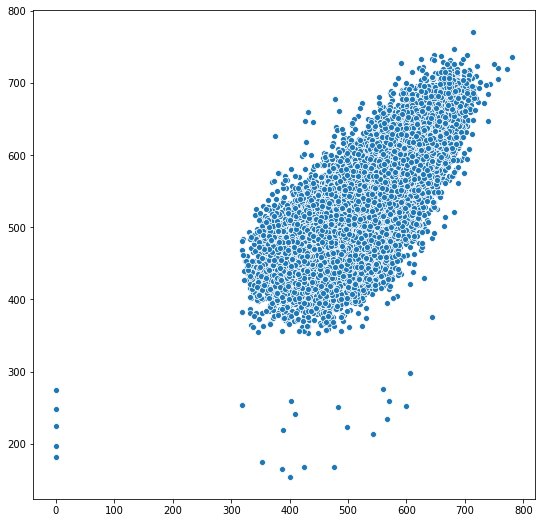

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem);

Plotar a relação dos valores de teste e o erro(valor de teste - predição)

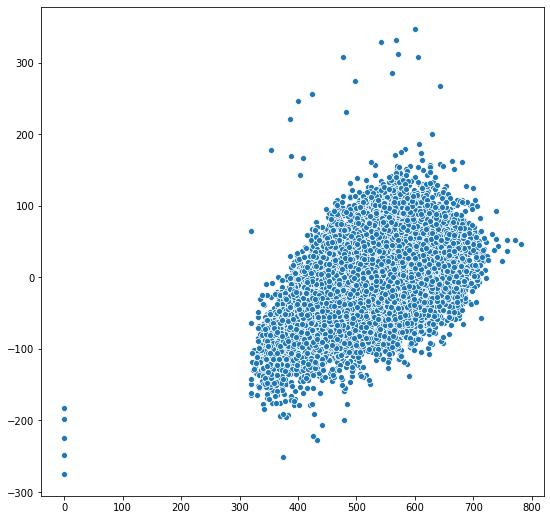

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=y_teste.values - predicoes_notas_linguagem)

Agora outro modelo de ML, Árvore de decisão

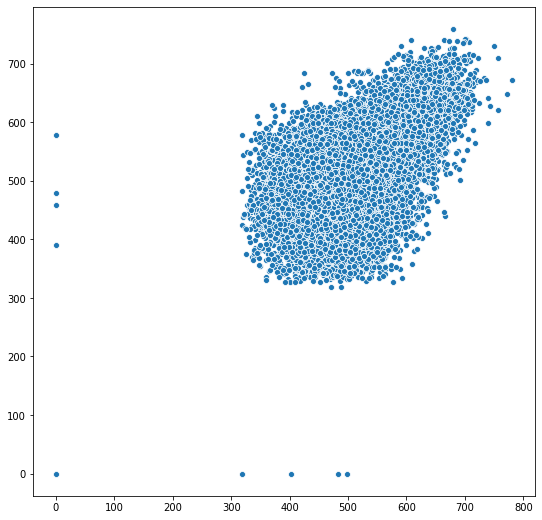

In [15]:
from sklearn.tree import DecisionTreeRegressor

#Instanciar o modelo
modelo = DecisionTreeRegressor()
#Treinar o modelo
modelo.fit(x_treino, y_treino)
#Predição do valor
predicoes_notas_linguagem = modelo.predict(x_teste)
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)

Como será a distribuição com relação as notas de matemática?

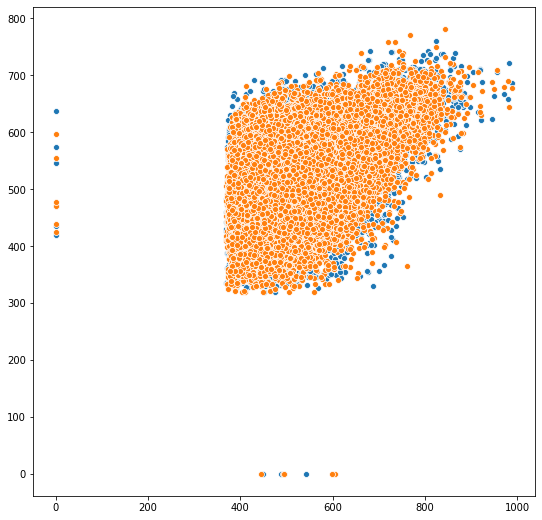

In [16]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=x_teste['matematica'].values, y=predicoes_notas_linguagem)
sns.scatterplot(x=x_teste['matematica'].values, y=y_teste.values)

Erro do modelo criado

In [17]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, predicoes_notas_linguagem)

4160.60

E se calcular o erro com base no dado de teste?

In [18]:
mean_squared_error(y_teste, y_teste)

0.00

O valor é 0 pois os dados são exatamente os mesmos

Verificar como é o erro para um modelo Dummy

In [19]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

mean_squared_error(y_teste, dummy_predicoes)

5137.48

O modelo já se sai melhor que um modelo bobo

# Desafios

## Desafio 1 da [Allan Spadini](https://twitter.com/allanspadini)

Explore os parâmetros C e o max_iter do modelo LinesSVR. Não há garantias que o resultado será melhor.

Retomando o código

```
from sklearn.svm import LinearSVR

modelo = LinearSVR()
modelo.fit(x_treino, y_treino)
```



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


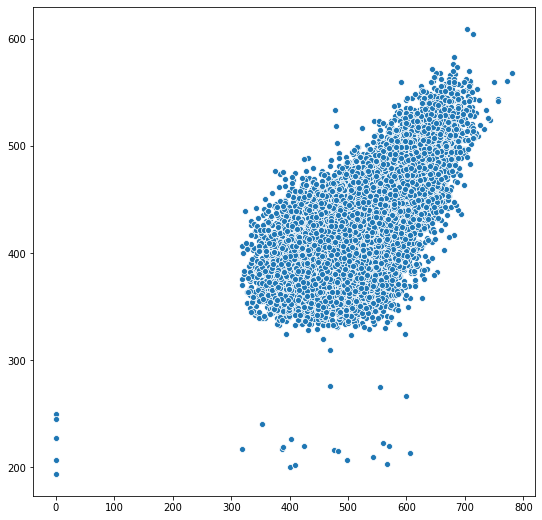

In [20]:
modelo = LinearSVR()
modelo.fit(x_treino, y_treino)
predicao = modelo.predict(x_teste)
#Calcular o erro
erro = mean_squared_error(y_teste,predicao)
#Plotar a relação
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicao);

In [21]:
print("O erro foi: {}".format(erro))

O erro foi: 12672.177191185621


Mudança do parâmetro C para 1.5, padrão é 1.0

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


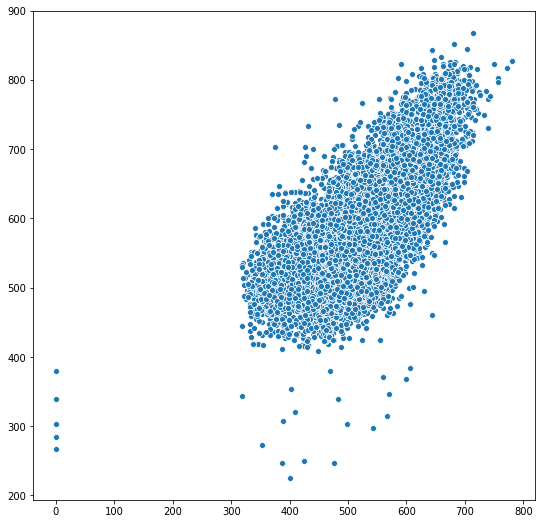

In [22]:
modelo = LinearSVR(C=1.5)
modelo.fit(x_treino, y_treino)
predicao = modelo.predict(x_teste)
#Calcular o erro
erro = mean_squared_error(y_teste,predicao)
#Plotar a relação
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicao);

In [23]:
print("O erro foi: {}".format(erro))

O erro foi: 6363.059217292498


Aumento do número de iterações, mantendo o C igual 1 1.5

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


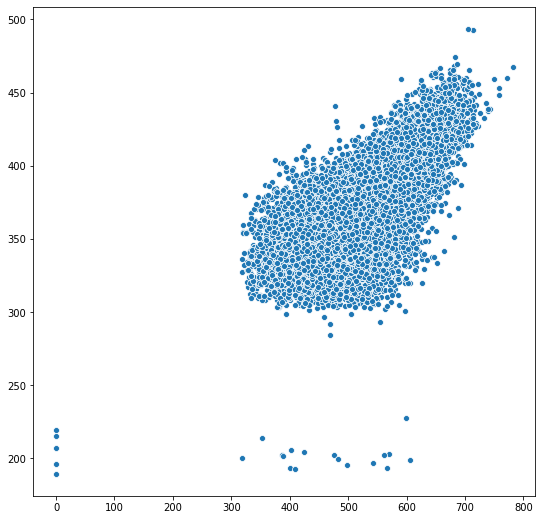

In [24]:
modelo = LinearSVR(C=1.5, max_iter=5000)
modelo.fit(x_treino, y_treino)
predicao = modelo.predict(x_teste)
#Calcular o erro
erro = mean_squared_error(y_teste,predicao)

#Plotar a relação
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicao);

In [25]:
print("O erro foi: {}".format(erro))

O erro foi: 27491.588502435825


Mudança do parâmetro C para 3.0, mantendo o número de iterações igual a 5000

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


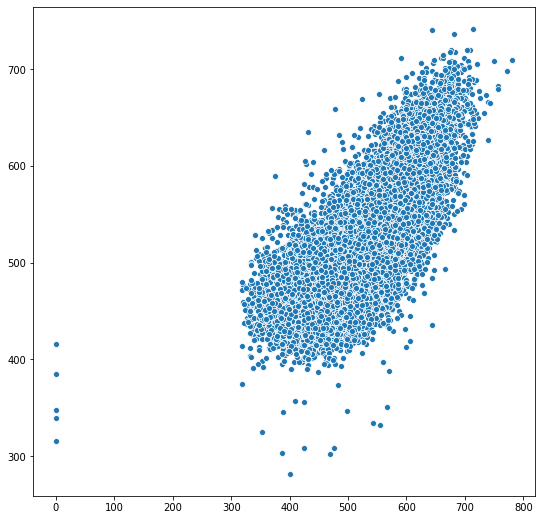

In [26]:
modelo = LinearSVR(C=3.0, max_iter=5000)
modelo.fit(x_treino, y_treino)
predicao = modelo.predict(x_teste)
#Calcular o erro
erro = mean_squared_error(y_teste,predicao)

#Plotar a relação
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicao);

In [27]:
print("O erro foi: {}".format(erro))

O erro foi: 2253.9025285130965


Aumento do número de iterações e manter o C igual a 1.5

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


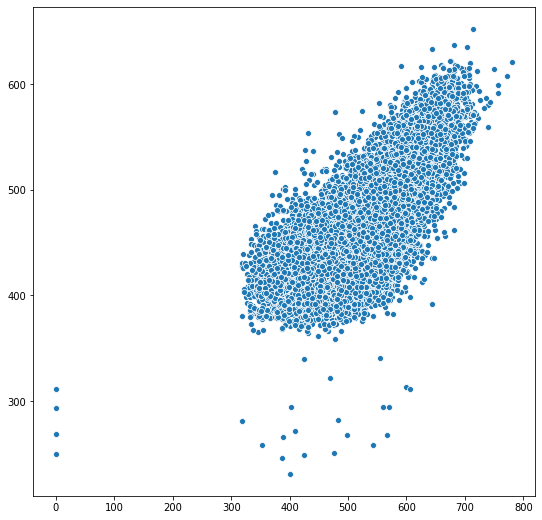

In [28]:
modelo = LinearSVR(C=1.5, max_iter=10000)
modelo.fit(x_treino, y_treino)
predicao = modelo.predict(x_teste)
#Calcular o erro
erro = mean_squared_error(y_teste,predicao)

#Plotar a relação
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicao);

In [29]:
print("O erro foi: {}".format(erro))

O erro foi: 5952.900200557925


Manter o número de iterações e alterar o C

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


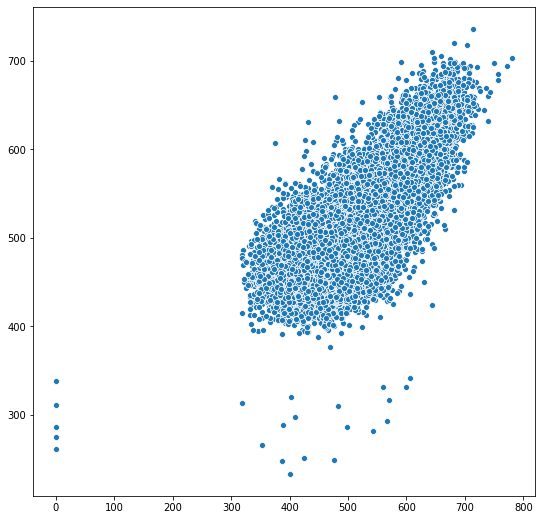

In [30]:
modelo = LinearSVR(C=3.0, max_iter=10000)
modelo.fit(x_treino, y_treino)
predicao = modelo.predict(x_teste)
#Calcular o erro
erro = mean_squared_error(y_teste,predicao)

#Plotar a relação
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicao);

In [31]:
print("O erro foi: {}".format(erro))

O erro foi: 2151.0607332513387


Mudar o número de iterações

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


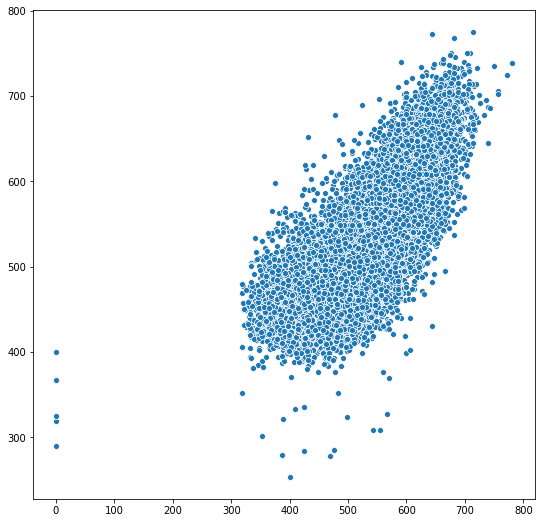

In [32]:
modelo = LinearSVR(C=3.0, max_iter=1000)
modelo.fit(x_treino, y_treino)
predicao = modelo.predict(x_teste)
#Calcular o erro
erro = mean_squared_error(y_teste,predicao)

#Plotar a relação
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicao);

In [33]:
print("O erro foi: {}".format(erro))

O erro foi: 2271.279181191403


Mudar o número de iterações

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


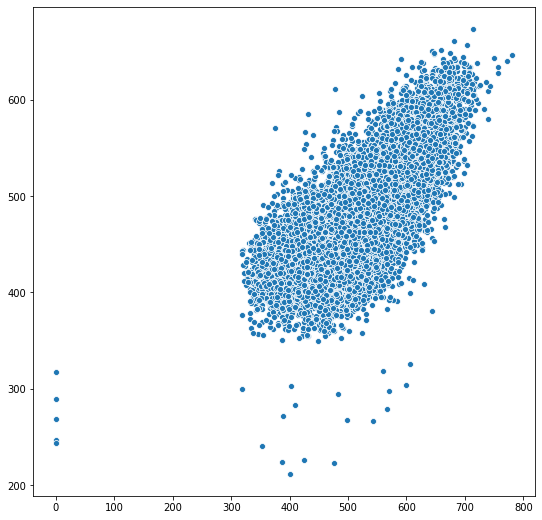

In [34]:
modelo = LinearSVR(C=3.0, max_iter=6000)
modelo.fit(x_treino, y_treino)
predicao = modelo.predict(x_teste)
#Calcular o erro
erro = mean_squared_error(y_teste,predicao)

#Plotar a relação
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicao);

In [35]:
print("O erro foi: {}".format(erro))

O erro foi: 4188.687814669913


Mudar o número de iterações

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


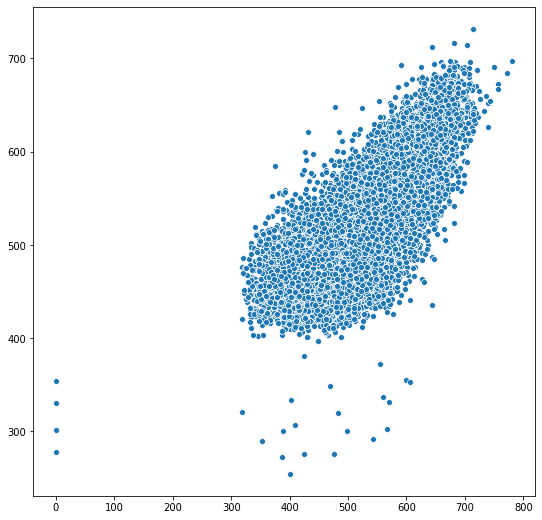

In [36]:
modelo = LinearSVR(C=3.0, max_iter=7500)
modelo.fit(x_treino, y_treino)
predicao = modelo.predict(x_teste)
#Calcular o erro
erro = mean_squared_error(y_teste,predicao)

#Plotar a relação
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicao);

In [37]:
print("O erro foi: {}".format(erro))

O erro foi: 2207.4942014095545


Manter o número de iterações igual a 6000 e o C igual a 6.0

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


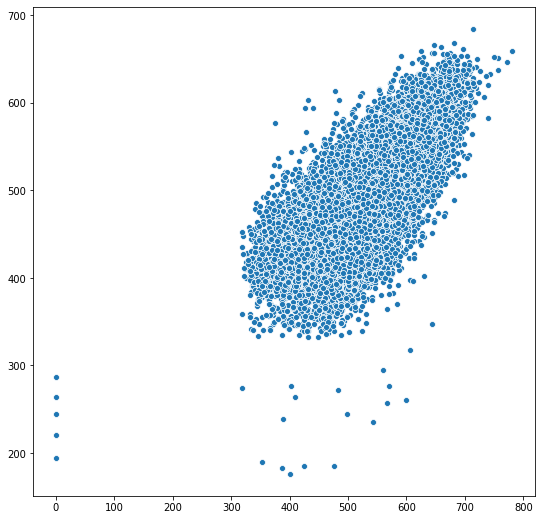

In [38]:
modelo = LinearSVR(C=6.0, max_iter=6000)
modelo.fit(x_treino, y_treino)
predicao = modelo.predict(x_teste)
#Calcular o erro
erro = mean_squared_error(y_teste,predicao)

#Plotar a relação
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicao);

In [39]:
print("O erro foi: {}".format(erro))

O erro foi: 3852.5330180173323


Manter o número de iterações e mudar o C para 10.0

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


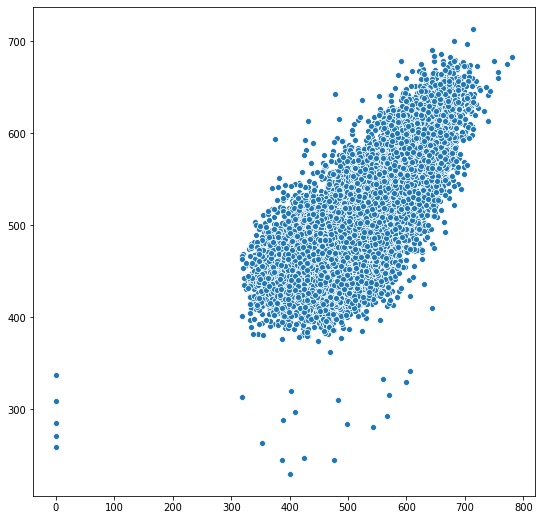

In [40]:
modelo = LinearSVR(C=10.0, max_iter=6000)
modelo.fit(x_treino, y_treino)
predicao = modelo.predict(x_teste)
#Calcular o erro
erro = mean_squared_error(y_teste,predicao)

#Plotar a relação
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicao);

In [41]:
print("O erro foi: {}".format(erro))

O erro foi: 2517.5090385379194


Mudar o C para 1.5 e manter o número de iterações

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


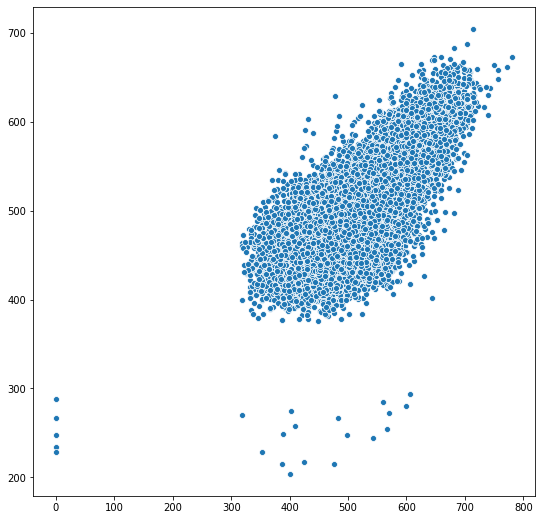

In [42]:
modelo = LinearSVR(C=1.5, max_iter=6000)
modelo.fit(x_treino, y_treino)
predicao = modelo.predict(x_teste)
#Calcular o erro
erro = mean_squared_error(y_teste,predicao)

#Plotar a relação
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicao);

In [43]:
print("O erro foi: {}".format(erro))

O erro foi: 2645.838223180381


## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

No gráfico em que plotamos a média com o valor previsto, plote a média das 4 notas ao invés de uma.

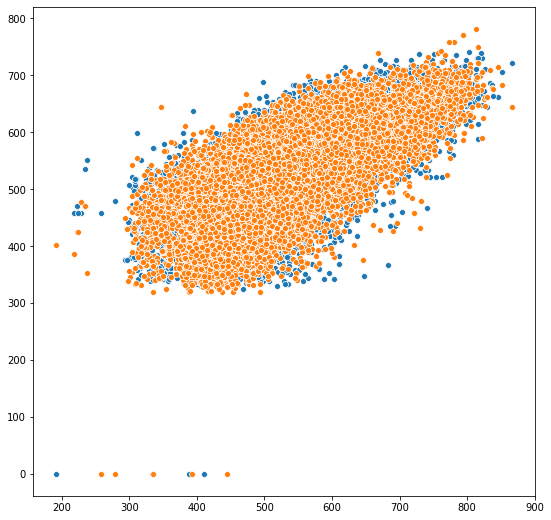

In [44]:
#Calcular a média das 4 notas em relação a cada linha(aluno)
x_teste_medio = x_teste.mean(axis=1)

#Instanciar o modelo
modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)
#Calcular o erro
erro = mean_squared_error(y_teste,predicoes_notas_linguagem)

plt.figure(figsize=(9,9))
sns.scatterplot(x=x_teste_medio.values, y=predicoes_notas_linguagem)
sns.scatterplot(x=x_teste_medio.values, y=y_teste.values)

In [45]:
print("O erro foi: {}".format(erro))

O erro foi: 4155.645648490829


Verificando a relação entre os valores de teste e os de predição, é possível perceber que de maneira geral os dados se sobrepõem, ainda com alguns pontos fora dessa relação, o que o deixa como um modelo ok.

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)


Remover as notas zero e testar os mesmos modelos, comparando o resultado

Relembrando o que foi feito no notebook da aula passada

In [46]:
def mudar_nota(area):
  dados_reformados.loc[dados['TP_PRESENCA_{}'.format(area)].isin([0,2]), 'NU_NOTA_{}'.format(area)] = 0 #0 para faltou e 2 para eliminado

dados_reformados = dados.copy()
mudar_nota("CH")
mudar_nota("LC")
mudar_nota("MT")
mudar_nota("CN")
#Visualizar mudança
dados_reformados[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', "NU_NOTA_REDACAO"]]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,0.00,0.00,0.00,0.00,nan
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
4,0.00,0.00,0.00,0.00,nan
...,...,...,...,...,...
137839,0.00,0.00,0.00,0.00,nan
137840,382.40,534.20,468.10,576.40,380.00
137841,0.00,0.00,0.00,0.00,nan
137842,452.70,509.30,527.70,591.40,300.00


Como não é dada presença para a redação,fazer o processo a parte

In [47]:
#A prova de redação ocorre no dia da prova de Ciências Humanas
dados_reformados.loc[dados['TP_PRESENCA_CH'].isin([0,2]), 'NU_NOTA_REDACAO'] = 0
#Visualizar mudança
dados_reformados[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', "NU_NOTA_REDACAO"]]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,0.00,0.00,0.00,0.00,0.00
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
4,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...
137839,0.00,0.00,0.00,0.00,0.00
137840,382.40,534.20,468.10,576.40,380.00
137841,0.00,0.00,0.00,0.00,0.00
137842,452.70,509.30,527.70,591.40,300.00


In [48]:
#Mudar o nome das colunas
colunas = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo' ,'matematica', 'redacao']
#Dataset só com as notas
dados_notas_com_0 = dados_reformados[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]
dados_notas_com_0.columns = colunas
#Mudança
dados_notas_com_0

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
0,0.00,0.00,0.00,0.00,0.00
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
4,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...
137839,0.00,0.00,0.00,0.00,0.00
137840,382.40,534.20,468.10,576.40,380.00
137841,0.00,0.00,0.00,0.00,0.00
137842,452.70,509.30,527.70,591.40,300.00


In [49]:
#Criar um novo dataset somente com notas acima de 0
dados_notas_sem_0 = dados_notas_com_0.copy()
dados_notas_sem_0 = dados_notas_com_0.query("ciencias_naturais > 0 & ciencias_humanas > 0 & linguagem_codigo >0 & matematica > 0 & redacao > 0")

#Visualizar esse dataframe
dados_notas_sem_0

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00
...,...,...,...,...,...
137835,511.50,606.90,504.80,513.40,520.00
137836,465.00,546.80,528.50,462.80,580.00
137838,576.20,610.40,538.30,486.80,820.00
137840,382.40,534.20,468.10,576.40,380.00


Através desse procedimento, quantos dados foram retirados?

In [50]:
print("Número de linhas retiradas: {}".format(len(dados_notas)- len(dados_notas_sem_0)))

Número de linhas retiradas: 2089


Separar nossas features e dados alvo

In [0]:
x_4_notas_sem_0 = dados_notas_sem_0[['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']]
y_adivinhar_sem_0 = dados_notas_sem_0['linguagem_codigo']

Dados originais

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


O erro foi: 2537.7405305771667


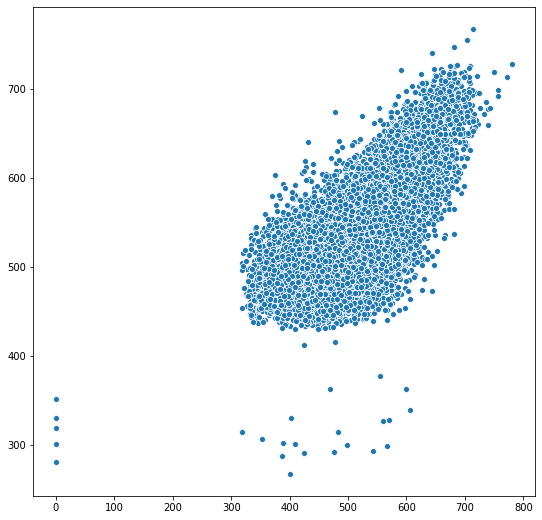

In [52]:
modelo = LinearSVR(C=3.0, max_iter=10000)
modelo.fit(x_treino, y_treino)
predicao = modelo.predict(x_teste)
#Calcular o erro
erro = mean_squared_error(y_teste,predicao)

#Plotar a relação
plt.figure(figsize=(9,9))
# sns.scatterplot(x=x_teste['matematica'].values, y=predicoes_notas_linguagem)
# sns.scatterplot(x=x_teste['matematica'].values, y=y_teste.values)
sns.scatterplot(x=y_teste.values, y=predicao);
print("O erro foi: {}".format(erro))

Criação do modelo com esse novo dataset

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


O erro foi: 2595.5006868832174


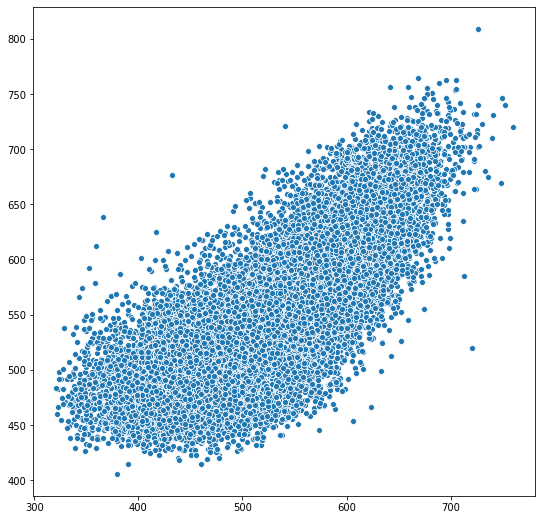

In [53]:
#Dividir entre os dados de treino e teste
x_treino_sem_0, x_teste_sem_0, y_treino_sem_0, y_teste_sem_0 = train_test_split(x_4_notas_sem_0, y_adivinhar_sem_0, random_state= 326784)

#Instanciar o modelo
modelo = LinearSVR(C=3.0, max_iter=10000)
modelo.fit(x_treino_sem_0, y_treino_sem_0)
predicoes_notas_linguagem = modelo.predict(x_teste_sem_0)
#Calcular o erro
erro = mean_squared_error(y_teste_sem_0,predicoes_notas_linguagem)

plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste_sem_0.values, y=predicoes_notas_linguagem);
print("O erro foi: {}".format(erro))
# sns.scatterplot(x=x_teste_medio.values, y=predicoes_notas_linguagem)
# sns.scatterplot(x=x_teste_medio.values, y=y_teste.values)

Em relação ao modelo de Linear SVR, o modelo que apresenta notas 0 demonstra-se pior

Decision Tree Regressor

Dados originais

O erro foi: 4153.136873509334


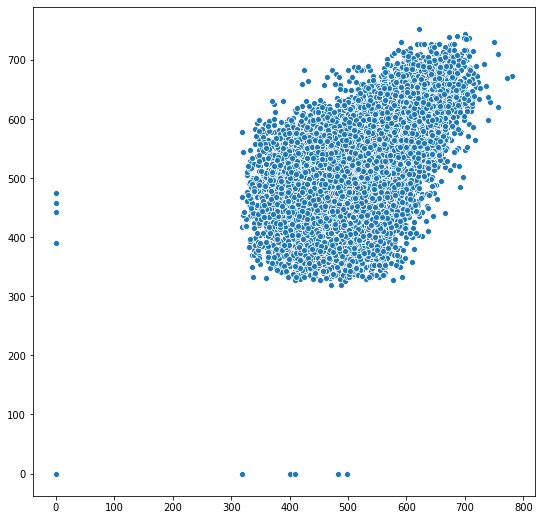

In [54]:
#Instanciar o modelo
modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)

#Calcular o erro
erro = mean_squared_error(y_teste, predicoes_notas_linguagem)
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)
print("O erro foi: {}".format(erro))

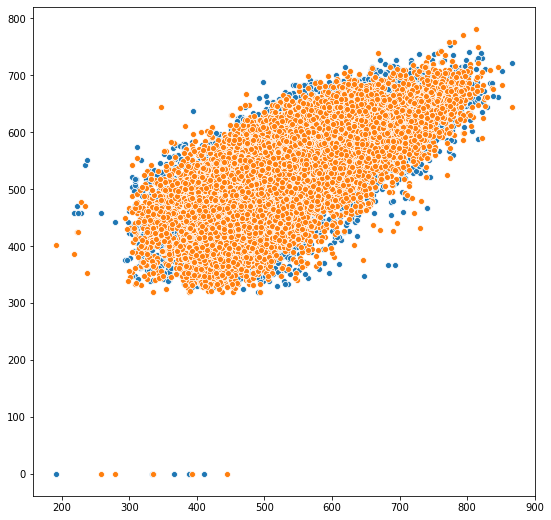

In [55]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=x_teste.mean(axis = 1).values, y=predicoes_notas_linguagem);
sns.scatterplot(x=x_teste.mean(axis = 1).values, y=y_teste.values);

Dados sem a nota 0

O erro foi: 4021.1805626996133


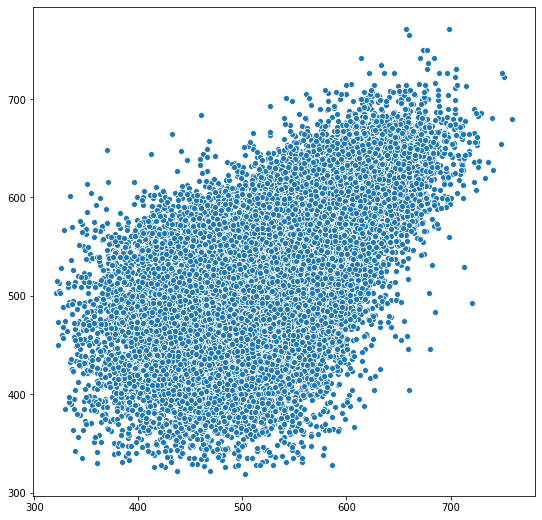

In [56]:
#Instanciar o modelo
modelo = DecisionTreeRegressor()
modelo.fit(x_treino_sem_0, y_treino_sem_0)
predicoes_notas_linguagem = modelo.predict(x_teste_sem_0)
#Calcular o erro
erro = mean_squared_error(y_teste_sem_0,predicoes_notas_linguagem)

plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste_sem_0.values, y=predicoes_notas_linguagem)
print("O erro foi: {}".format(erro))

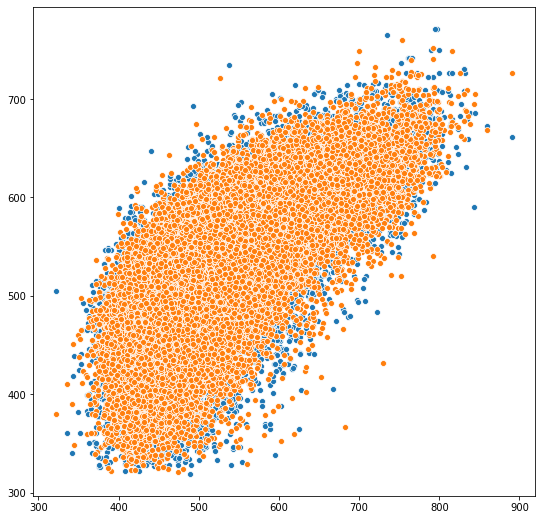

In [57]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=x_teste_sem_0.mean(axis = 1).values, y=predicoes_notas_linguagem);
sns.scatterplot(x=x_teste_sem_0.mean(axis = 1).values, y=y_teste_sem_0.values);

Portanto, o modelo se comporta melhor quando são retiradas as notas 0

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Interpretar tudo que foi feito e compartilhar suas conclusões



*   Importar a  base de dados do ENEM

  > Importar a base de dados do ENEM pelo github


*   Fazer a leitura dessa base de dados

  > Fazer a análise dessa base de dados, quais colunas estão no dataset, quais colunas devemos dar prioridade e de que maneira estão organizados os dados nessas colunas

* "Limpeza" da base de dados

  > Feita essa análise com a base de dados, quais dados devemos ou podemos tirar? Eles nos ajudam a alcançar nosso objetivo ou só pioram a situação?

* Predição

  > Feita essa limpeza, há como prever a nota de um participante com base nas suas outra notas, há alguma relação entre essas notas?





Conclusão: Dada essa base de dados, é possível determinar a nota de um participante com relação a outras, se sim o que isso implica? É possível diminuir o número de áreas da prova, economizar papel, tinta, é possível que se venha e faça a prova num dia, não precise fazer na outra? Todas essas questões podem ser levantadas com a análise e a predição da nossa base de dados seguindo os processos acima

## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Calcule as métricas de erro que utilizamos (mean square root error) também no conjunto de treino, e veja o que acontece comparado com o conjunto de teste.

In [58]:
#Instanciar o modelo
modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)
#prever os dados de treino
predicoes_notas_linguagem = modelo.predict(x_treino)
#Calcular o valor da função de erro
erro_treino = mean_squared_error(y_treino, predicoes_notas_linguagem)

print("Erro de treino: {}".format(erro_treino))

Erro de treino: 0.0


Dado o modelo ter acertado todas as predições dos dados de treino, porém, ter feito uma predição bem errada para os dados de teste implica que o modelo não se aplica para a vida real, o modelo não se desempenha bem para os dados de teste(overfitting)